DATASET INSTALLATION AND UNZIPPING

In [ ]:
import pandas as pd
import zipfile
import os
import glob

#unzipping
zip_file_name = "/content/news_articles.csv.zip"

if os.path.exists(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall("dataset_folder")
    print("Unzipped successfully!")
else:
    print(f"Error: File '{zip_file_name}' not found. Did you upload it?")

csv_files = glob.glob("dataset_folder/*.csv")

if csv_files:
    filename = csv_files[0]
    print(f"Reading file: {filename}")
    df = pd.read_csv(filename)

    display(df.head())
    print("\nShape of dataset:", df.shape)
    print("\nColumns in dataset:", df.columns)
else:
    print("No CSV file found in the zip archive.")

Unzipped successfully!
Reading file: dataset_folder/news_articles.csv


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0



Shape of dataset: (2096, 12)

Columns in dataset: Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')


CLEANING AND PREPROCESSING

In [ ]:
import numpy as np
import re
import string

TEXT_COLUMN = 'text'
LABEL_COLUMN = 'label'

#cleaning dataset
print(f"Original shape: {df.shape}")
df = df.dropna(subset=[TEXT_COLUMN, LABEL_COLUMN]) #drop missing values
#using label encoders, fake -> 0; real -> 1.
if df[LABEL_COLUMN].dtype == 'object':
    label_mapping = {'Fake': 0, 'Real': 1, 'FAKE': 0, 'REAL': 1}
    df[LABEL_COLUMN] = df[LABEL_COLUMN].map(label_mapping)

# Preprocessing Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(f'[{string.punctuation}]', '', text) # Remove punctuation
    return text

df['clean_text'] = df[TEXT_COLUMN].apply(clean_text)
print(f"Cleaned shape: {df.shape}")

Original shape: (2096, 12)
Cleaned shape: (2050, 13)


USING KMEANS CLUSTERING

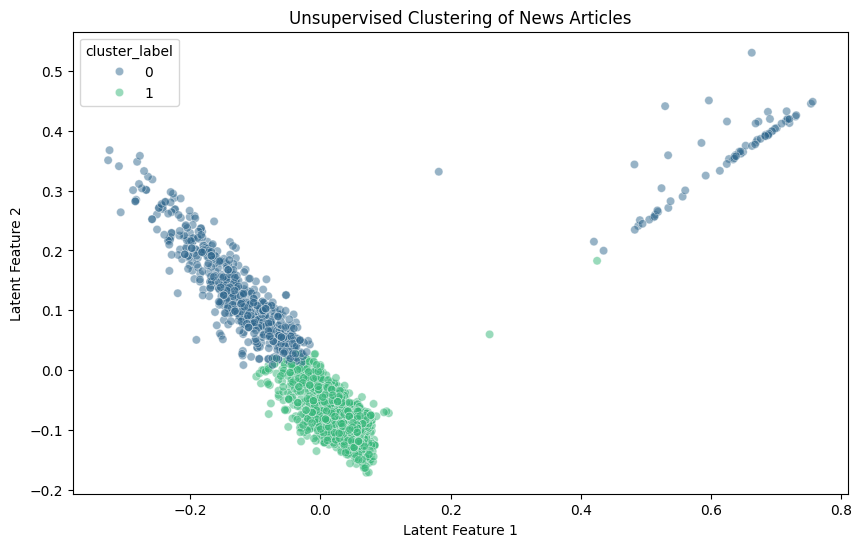

Implemented Unsupervised K-Means clustering to identify latent topics in news data.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#vectorizing
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_text = tfidf.fit_transform(df['clean_text']).toarray()

# 2. Unsupervised Learning: Can we find patterns without being told what is fake?
#kmeans to cluster the articles in 2 groups
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X_text)

#visualizing high dimension data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_text)
plt.figure(figsize=(10, 6)) #plotting
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_label'], palette='viridis', alpha=0.5)
plt.title('Unsupervised Clustering of News Articles')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.show()

print("Implemented Unsupervised K-Means clustering to identify latent topics in news data.")

SUPERVISED APPROACH

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_text, df['label'], test_size=0.2, random_state=42)
#randomforest classifier as the data is source based
rf_model = RandomForestClassifier(n_estimators=200, class_weight = 'balanced', random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
#FINAL PREDICTION
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       249
           1       0.83      0.53      0.64       161

    accuracy                           0.77       410
   macro avg       0.79      0.73      0.74       410
weighted avg       0.78      0.77      0.76       410



In [12]:
!rm -rf .git
!echo ".config/" > .gitignore
!echo "sample_data/" >> .gitignore